In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Data Exploration

The notebook contains the initial data exploration of the MovieLens dataset. The dataset is available at [https://grouplens.org/datasets/movielens/](https://grouplens.org/datasets/movielens/). The dataset contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018.

## Loading

Let's load the data into a pandas dataframe.

In [4]:
DATA_FOLDER = '../data/raw/ml-100k'

In [5]:
data = pd.read_csv(
    os.path.join(DATA_FOLDER, 'u.data'), 
    sep='\t', 
    names=['user_id', 'item_id', 'rating', 'timestamp']
)
data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
user_data = pd.read_csv(
    os.path.join(DATA_FOLDER, 'u.user'),
    sep='|',
    names=['id', 'age', 'gender', 'occupation', 'zip_code']   
)
user_data.describe()

,id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


Loading the film data using dataset description file.


In [9]:
films = pd.read_csv(
    os.path.join(DATA_FOLDER, 'u.item'),
    sep='|',
    names=['id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western'],
    encoding='unicode_escape' 
)
films.describe()

,id,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   childrens           1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film-noir           1682 non-null   int64  
 16  horror

In [11]:
films.drop(columns=['video_release_date', 'imdb_url'], inplace=True)

# Data Statistics

Now that we have loaded the data, let's look at some statistics of the data. We will look at the number of users, movies and ratings in the dataset.

## Films By Genres

Let's look at the number of films in each genre.

In [12]:
film_user = pd.merge(data, user_data, left_on='user_id', right_on='id')
film_user = pd.merge(film_user, films, left_on='item_id', right_on='id')
genre_watches = {}
for genre in films.columns[5:]:
    # Count how many unique users have watched each genre
    genre_watches[genre] = film_user[film_user[genre] == 1]['user_id'].nunique()
genre_watches

{'adventure': 901,
 'animation': 659,
 'childrens': 805,
 'comedy': 940,
 'crime': 914,
 'documentary': 352,
 'drama': 943,
 'fantasy': 512,
 'film-noir': 618,
 'horror': 789,
 'musical': 754,
 'mystery': 897,
 'romance': 943,
 'sci-fi': 908,
 'thriller': 937,
 'war': 925,
 'western': 491}

In [13]:
films['drama'].sum()
genre_watches['drama']

943

Let us produce a bar chart of the number of films in each genre.

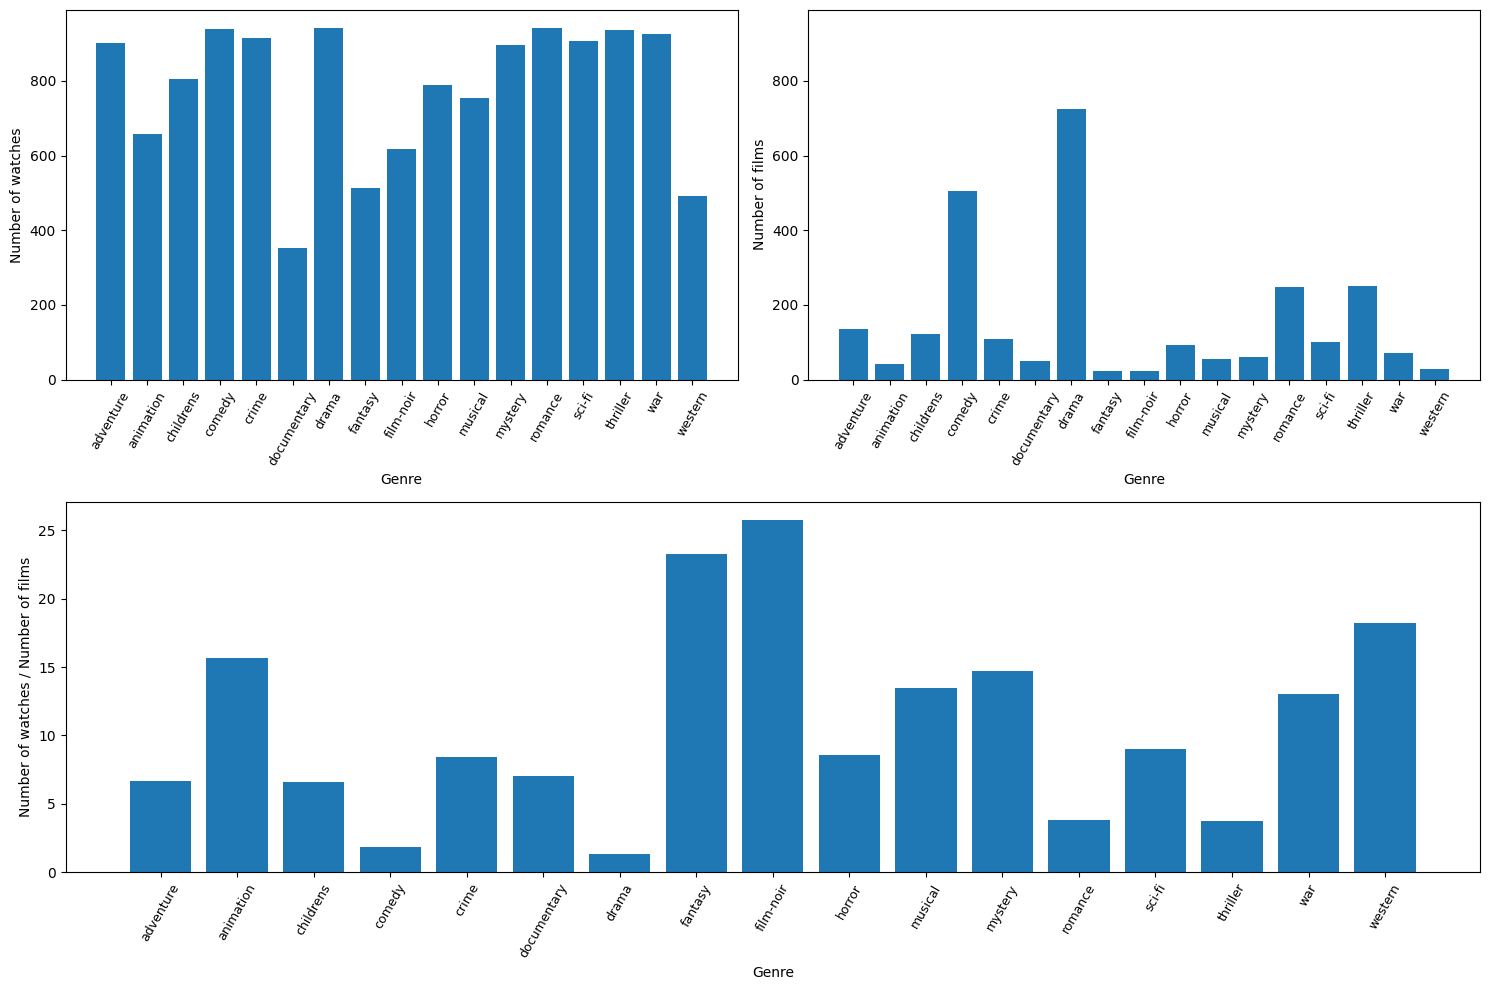

In [14]:
# Figure layout

# | num of watches | num of films |
# | num of watches divided by num of films   |


fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)

ax1.bar(genre_watches.keys(), genre_watches.values())
ax1.set_xticks(range(len(genre_watches.keys())))
ax1.set_xticklabels(genre_watches.keys(), rotation=60, fontsize=9)
ax1.set_ylabel('Number of watches')
ax1.set_xlabel('Genre')

ax2 = fig.add_subplot(222, sharey=ax1)
ax2.bar(genre_watches.keys(), [films[genre].sum() for genre in genre_watches.keys()])
ax2.set_xticks(range(len(genre_watches.keys())))
ax2.set_xticklabels(genre_watches.keys(), rotation=60, fontsize=9)
ax2.set_ylabel('Number of films')
ax2.set_xlabel('Genre')


# axis take (3, 4)
bot_ax = fig.add_subplot(2, 2, (3, 4))
bot_ax.bar(genre_watches.keys(), [genre_watches[genre] / films[genre].sum() for genre in genre_watches.keys()])
bot_ax.set_xticks(range(len(genre_watches.keys())))
bot_ax.set_xticklabels(genre_watches.keys(), rotation=60, fontsize=9)
bot_ax.set_ylabel('Number of watches / Number of films')
bot_ax.set_xlabel('Genre')


plt.tight_layout()
plt.show()



#

## Unique Genres Watched By Users

Now let's look at the number of unique genres watched by users. We will also look at the number of users who have watched films in each genre.

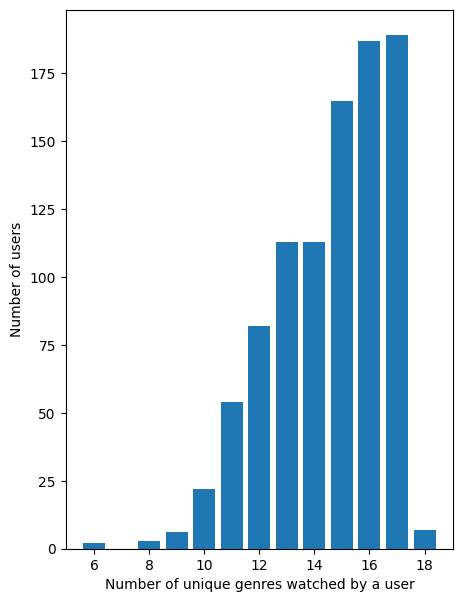

In [15]:
x = film_user.iloc[:, -19:-1].merge(film_user['user_id'], left_index=True, right_index=True).sort_values(by='user_id')
x = x.groupby('user_id').max()
x.insert(0, 'total', x.sum(axis=1))
plt.figure(figsize=(5, 7))

plt.bar(
    x=x.total.value_counts().index,
    height=x.total.value_counts().values
)

plt.xlabel('Number of unique genres watched by a user')
plt.ylabel('Number of users')
plt.show()

In [16]:
# Count what are the minimal rating score for each user
user_min_ratings = film_user.groupby('user_id')['rating'].min()
user_min_ratings

user_id
1      1
2      1
3      1
4      2
5      1
      ..
939    2
940    1
941    2
942    2
943    1
Name: rating, Length: 943, dtype: int64

## Genre x Occupation Correlation

One of the questions we want to answer is whether the genre of films watched by users is correlated with their occupation. Let's look at the correlation between the genre of films watched by users and their occupation.

In [17]:
genres = genre_watches.keys()
matrix = pd.DataFrame(index=genres, columns=user_data['occupation'].unique(), data=0)
for key, gr in film_user.groupby('user_id'):
    occupations = user_data[user_data['id'] == key]['occupation']
    film = films[films['id'] == gr['item_id'].unique()[0]]
    for occupation in occupations:
        for genr in genres:
            if film[genr].values[0] == 1:
                matrix.loc[genr, occupation] += 1
        

matrix
    

,technician,other,writer,executive,administrator,student,lawyer,educator,scientist,entertainment,...,librarian,homemaker,artist,engineer,marketing,none,healthcare,retired,salesman,doctor
adventure,5,9,2,2,12,27,2,13,3,1,...,4,0,5,8,2,0,3,2,0,0
animation,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
childrens,1,0,1,0,0,4,0,1,1,0,...,0,1,1,3,0,0,0,1,0,0
comedy,22,74,29,25,59,156,8,72,21,9,...,32,5,18,60,12,7,14,11,5,4
crime,1,0,2,0,2,1,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
documentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
drama,11,33,16,9,25,39,6,34,12,8,...,23,1,12,15,15,2,4,4,5,3
fantasy,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
film-noir,0,0,2,0,2,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
horror,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us visualize the correlation between the genre of films watched by users and their occupation using a heatmap.

<Axes: >

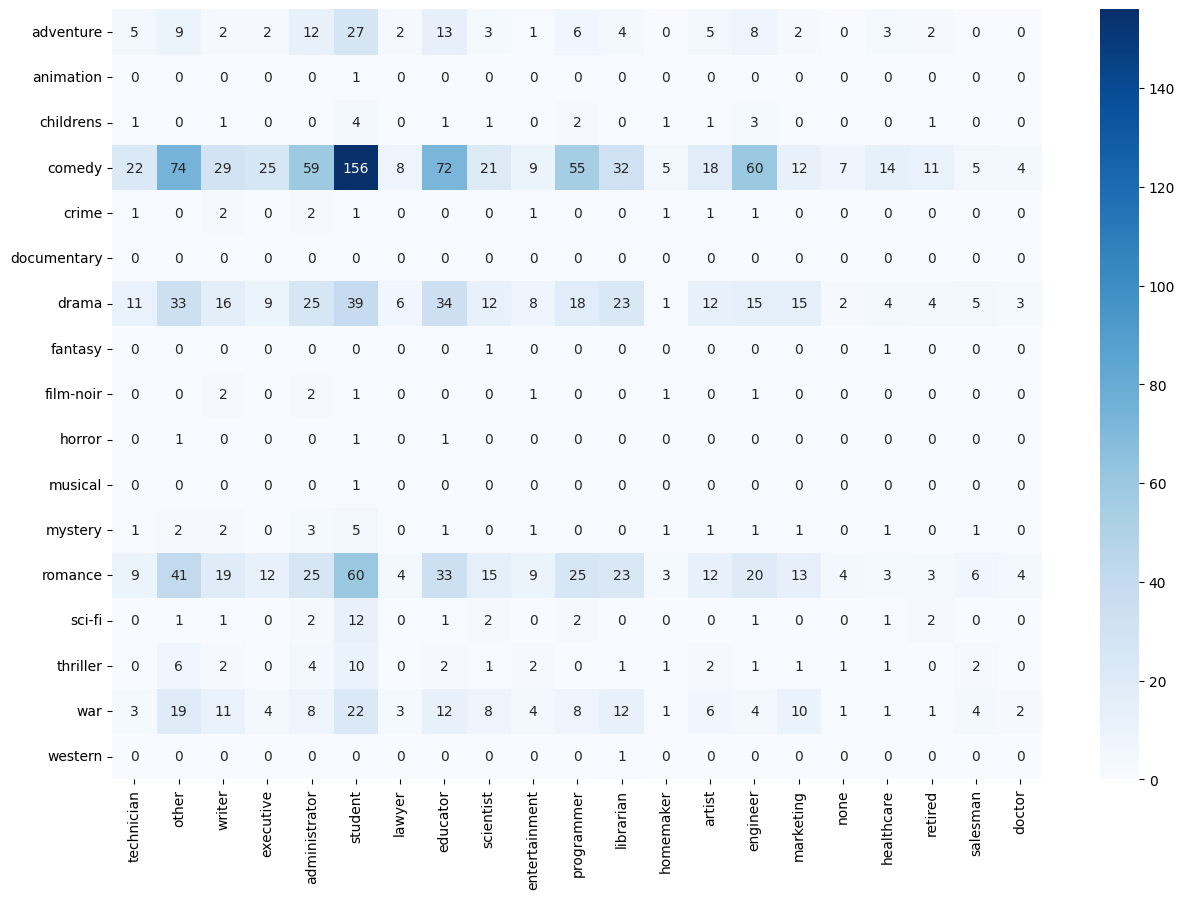

In [18]:
# Plot Heat Map

plt.figure(figsize=(15, 10))

sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

After training the model, a fact of poor performance was observed. To investigate the reason, we will look at general statistics of the data.

In [38]:
numerics = data.select_dtypes(include='number')
movie_stats = pd.pivot_table(
    data=numerics, 
    index='item_id', 
    values='rating', 
    aggfunc=['mean', 'std', 'count', 'median'],
)

# Rename columns to properly
movie_stats.columns = ['mean', 'std', 'count', 'median']
movie_stats.sort_values(by='count', ascending=True)
# Filter out movies with less than 8 ratings
movie_stats = movie_stats[movie_stats['count'] >= 8]
movie_stats.head()

,mean,std,count,median
item_id,,,,
1,3.878319,0.927897,452,4.0
2,3.206107,0.966497,131,3.0
3,3.033333,1.212760,90,3.0
4,3.550239,0.965069,209,4.0
5,3.302326,0.946446,86,3.0


/tmp/ipykernel_35098/976897762.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_stats['median'], ax=ax[0])
/tmp/ipykernel_35098/976897762.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_stats['mean'], ax=ax[1])
/tmp/ipykernel_35098/976897762.py:7: UserWarning: 

`distplot` is 

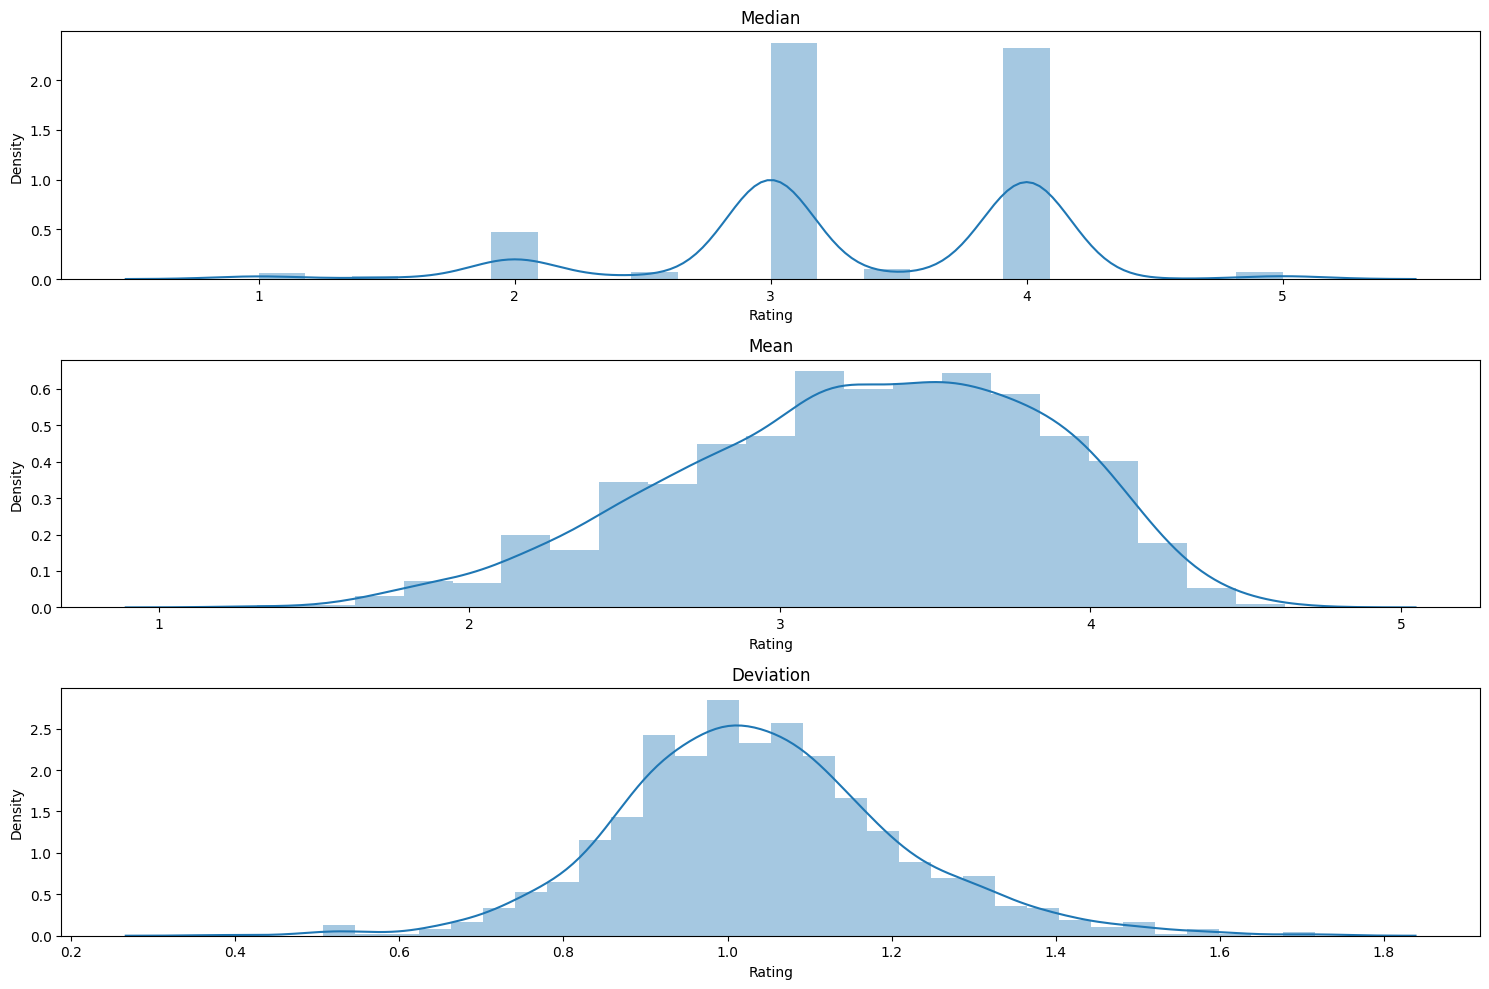

In [42]:
count = movie_stats['count']

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

sns.distplot(movie_stats['median'], ax=ax[0])
sns.distplot(movie_stats['mean'], ax=ax[1])
sns.distplot(movie_stats['std'], ax=ax[2])

ax[0].set_title('Median')
ax[1].set_title('Mean')
ax[2].set_title('Deviation')

ax[0].set_xlabel('Rating')
ax[1].set_xlabel('Rating')
ax[2].set_xlabel('Rating')

ax[0].set_ylabel('Density')
ax[1].set_ylabel('Density')
ax[2].set_ylabel('Density')

plt.tight_layout()
plt.show()